In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score


In [2]:
# load dataset
df=pd.read_csv (r'../data/raw/synthetic_fraud_dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
# Quick overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Shape: (50000, 21)

Columns: ['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type', 'Timestamp', 'Account_Balance', 'Device_Type', 'Location', 'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age', 'Transaction_Distance', 'Authentication_Method', 'Risk_Score', 'Is_Weekend', 'Fraud_Label']

First 5 rows:


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [4]:
# Data types and non-null counts
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d   

In [5]:
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


In [6]:
# Summary for numeric and categorical columns
print("\nNumeric summary:")
display(df.describe())

print("\nCategorical summary:")
display(df.describe(include='object'))


Numeric summary:


,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000



Categorical summary:


,Transaction_ID,User_ID,Transaction_Type,Timestamp,Device_Type,Location,Merchant_Category,Card_Type,Authentication_Method
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,50000,8963,4,47724,3,5,5,4,4
top,TXN_33553,USER_6599,POS,2023-06-04 06:35:00,Tablet,Tokyo,Clothing,Mastercard,Biometric
freq,1,16,12549,4,16779,10208,10033,12693,12591


In [7]:
# Count how many fraud vs non-fraud
print("\nFraud label distribution:")
print(df['Fraud_Label'].value_counts())



Fraud label distribution:
Fraud_Label
0    33933
1    16067
Name: count, dtype: int64


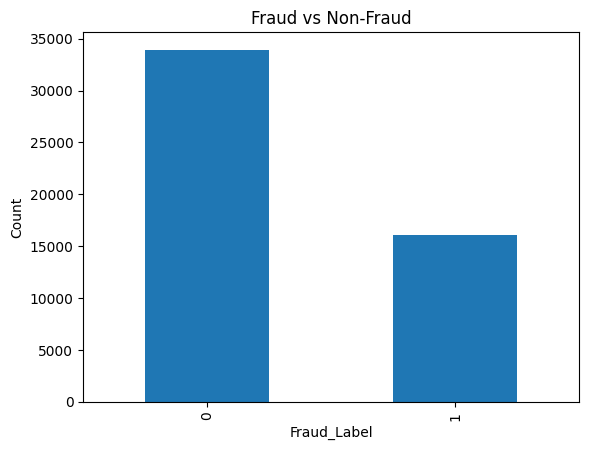

In [8]:

# Plot if you want
df['Fraud_Label'].value_counts().plot(kind='bar', title='Fraud vs Non-Fraud')
plt.xlabel('Fraud_Label')
plt.ylabel('Count')
plt.show()

In [9]:
#we see how imbalanced it is

df['Fraud_Label'].value_counts()
df['Fraud_Label'].value_counts(normalize=True)

Fraud_Label
0    0.67866
1    0.32134
Name: proportion, dtype: float64

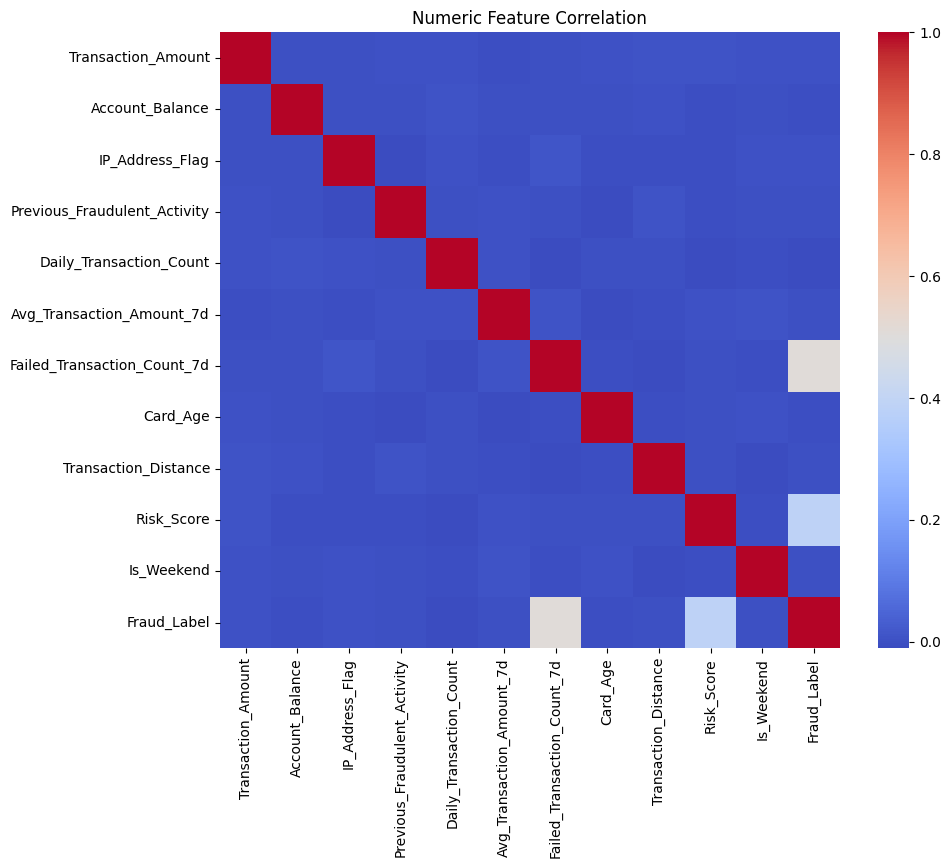

In [10]:
# Quick correlation heatmap for numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Numeric Feature Correlation")
plt.show()

In [11]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

Transaction_ID                  50000
User_ID                          8963
Transaction_Amount              21763
Transaction_Type                    4
Timestamp                       47724
Account_Balance                 49867
Device_Type                         3
Location                            5
Merchant_Category                   5
IP_Address_Flag                     2
Previous_Fraudulent_Activity        2
Daily_Transaction_Count            14
Avg_Transaction_Amount_7d       31420
Failed_Transaction_Count_7d         5
Card_Type                           4
Card_Age                          239
Transaction_Distance            47546
Authentication_Method               4
Risk_Score                       9931
Is_Weekend                          2
Fraud_Label                         2
dtype: int64

In [12]:
#Define Features and Target
X = df.drop(columns=['Fraud_Label', 'Transaction_ID', 'User_ID', 'Timestamp'])
y = df['Fraud_Label']

In [13]:
# Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# we seperate Numerical Columns

numeric_cols = ['Risk_Score', 'Failed_Transaction_Count_7d']

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# New preprocessor: only scale these two numeric features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
])

In [15]:
# we build the Pipeline 

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=None
    ))
])

In [16]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6787
           1       1.00      1.00      1.00      3213

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

ROC AUC: 1.0


In [17]:
# below is the old codes

In [18]:
# df['Failed_to_Total_Ratio'] = df['Failed_Transaction_Count_7d'] / (df['Daily_Transaction_Count'] + 1)


In [19]:
# 1. Correlation of each column with the target
df.corr(numeric_only=True)['Fraud_Label'].sort_values(ascending=False).head(10)


Fraud_Label                     1.000000
Failed_Transaction_Count_7d     0.509871
Risk_Score                      0.385810
IP_Address_Flag                 0.003028
Transaction_Amount              0.001901
Avg_Transaction_Amount_7d       0.000703
Is_Weekend                      0.000064
Transaction_Distance           -0.000116
Previous_Fraudulent_Activity   -0.000718
Card_Age                       -0.003120
Name: Fraud_Label, dtype: float64

In [22]:
df = df.drop_duplicates()
df = df.dropna(subset=['Fraud_Label'])  # target must not be missing
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [21]:
#missing values in columns
df['Account_Balance'] = df['Account_Balance'].fillna(df['Account_Balance'].median())
df['Device_Type'] = df['Device_Type'].fillna('Unknown')

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categoricals
df = pd.get_dummies(df, columns=['Transaction_Type', 'Device_Type', 'Merchant_Category', 'Card_Type', 'Authentication_Method'], drop_first=True)

# Scale numeric columns
scaler = StandardScaler()
numeric_cols = ['Transaction_Amount', 'Account_Balance', 'Card_Age', 'Transaction_Distance', 'Risk_Score']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [27]:
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: ['Location']


In [28]:
#Simplified RandomForest (no scaling)

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
#Separate target 
y = df['Fraud_Label'] 
X = df.drop(['Fraud_Label', 'Transaction_ID', 'User_ID', 'Timestamp'], axis=1) 
# Identify categorical and numeric columns 
categorical_cols = X.select_dtypes(include=['object']).columns 
numeric_cols = X.select_dtypes(exclude=['object']).columns 
#Preprocessor 
preprocessor = ColumnTransformer([ ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols), ('numeric', 'passthrough', numeric_cols) ]) 
#Pipeline (preprocessing + model) 
model = Pipeline(steps=[ ('preprocessor', preprocessor), ('classifier', RandomForestClassifier()) ]) 
#Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
#Train 
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numeric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)

# Predicted probabilities (for ROC-AUC)
y_prob = model.predict_proba(X_test)[:, 1]

# Print performance metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6787
           1       1.00      1.00      1.00      3213

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

ROC-AUC: 1.0


In [30]:
# Multi-Model Benchmark (LR, RF, GB)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# --- Split data ---
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Detect column types ---
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

# --- Shared preprocessor ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# --- Define models inside pipelines ---
pipelines = {
    "LogisticRegression": Pipeline([
        ('preprocess', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    "RandomForest": Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ]),
    "GradientBoosting": Pipeline([
        ('preprocess', preprocessor),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
}

# --- Train and evaluate each ---
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    probs = pipe.predict_proba(X_test)[:, 1]
    print(f"\n{name}")
    print(classification_report(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, probs))
    print("-"*60)



LogisticRegression
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      6787
           1       0.69      0.64      0.67      3213

    accuracy                           0.79     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.79      0.79      0.79     10000

ROC-AUC: 0.8844068577122254
------------------------------------------------------------

RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6787
           1       1.00      1.00      1.00      3213

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

ROC-AUC: 1.0
------------------------------------------------------------

GradientBoosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6787
           1       1.0

In [31]:
# Pick one trained pipeline, e.g. the random forest
rf_pipeline = pipelines["RandomForest"]

# Get feature names after preprocessing
ohe = rf_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_cols = list(ohe.get_feature_names_out(cat_cols))
all_features = list(num_cols) + encoded_cat_cols

# Get importances
importances = rf_pipeline.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

print(feat_imp.head(20))

Failed_Transaction_Count_7d     0.509431
Risk_Score                      0.369509
Transaction_Distance            0.001481
Transaction_Amount              0.001356
Avg_Transaction_Amount_7d       0.001348
Account_Balance                 0.001267
Card_Age                        0.001252
Daily_Transaction_Count         0.000902
Is_Weekend                      0.000304
Location_Tokyo                  0.000255
Location_London                 0.000227
Location_Mumbai                 0.000222
Location_Sydney                 0.000218
Location_New York               0.000216
Previous_Fraudulent_Activity    0.000158
User_ID_USER_7343               0.000127
IP_Address_Flag                 0.000118
User_ID_USER_4773               0.000110
User_ID_USER_4939               0.000081
User_ID_USER_3841               0.000076
dtype: float64


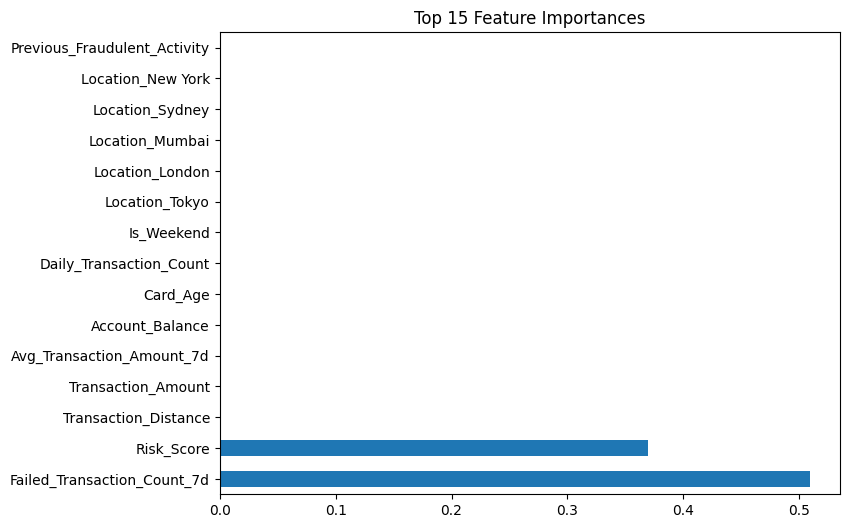

In [32]:
import matplotlib.pyplot as plt

feat_imp.head(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Feature Importances")
plt.show()

In [ ]:
#Optimize Model Hyperparameters

# Use GridSearchCV or RandomizedSearchCV to tune the best model:

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10]
}

search = RandomizedSearchCV(
    rf_pipeline, param_grid,
    n_iter=10, scoring='roc_auc',
    cv=3, random_state=42, n_jobs=-1
)
search.fit(X_train, y_train)
print("Best ROC-AUC:", search.best_score_)
print("Best Params:", search.best_params_)

In [ ]:
# from fraud_pipeline import FraudPipeline

# pipeline = FraudPipeline(model='random_forest')
# pipeline.fit("paypal_data.csv")
# # pipeline.predict("new_stripe_data.csv", output="fraud_scores.csv")